In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
print("Keys of iris_dataset:\n", iris_dataset.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
print(iris_dataset['DESCR'][:600] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== 
...


In [5]:
print("Target names:", iris_dataset['target_names'])


Target names: ['setosa' 'versicolor' 'virginica']


In [8]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          print("Feature names:\n", iris_dataset['feature_names'])
print ("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
print("Type of data:", type(iris_dataset['data']))


Type of data: <class 'numpy.ndarray'>


In [9]:
print("Shape of data:", iris_dataset['data'].shape)

Shape of data: (150, 4)


In [10]:
print("First five rows of data:\n", iris_dataset['data'][:5])

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [12]:
print("Type of target:", type(iris_dataset['target']))

Type of target: <class 'numpy.ndarray'>


In [13]:
print("Shape of target:", iris_dataset['target'].shape)

Shape of target: (150,)


In [14]:
print("Target:\n", iris_dataset['target'])

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:
## Create Train and Test Model

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], test_size=0.3, random_state=41)

In [17]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (105, 4)
y_train shape: (105,)


In [18]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (45, 4)
y_test shape: (45,)


In [19]:
!pip install mglearn

   ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
   ---------------------------------------- 581.4/581.4 kB 5.1 MB/s eta 0:00:00


In [22]:
import mglearn
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

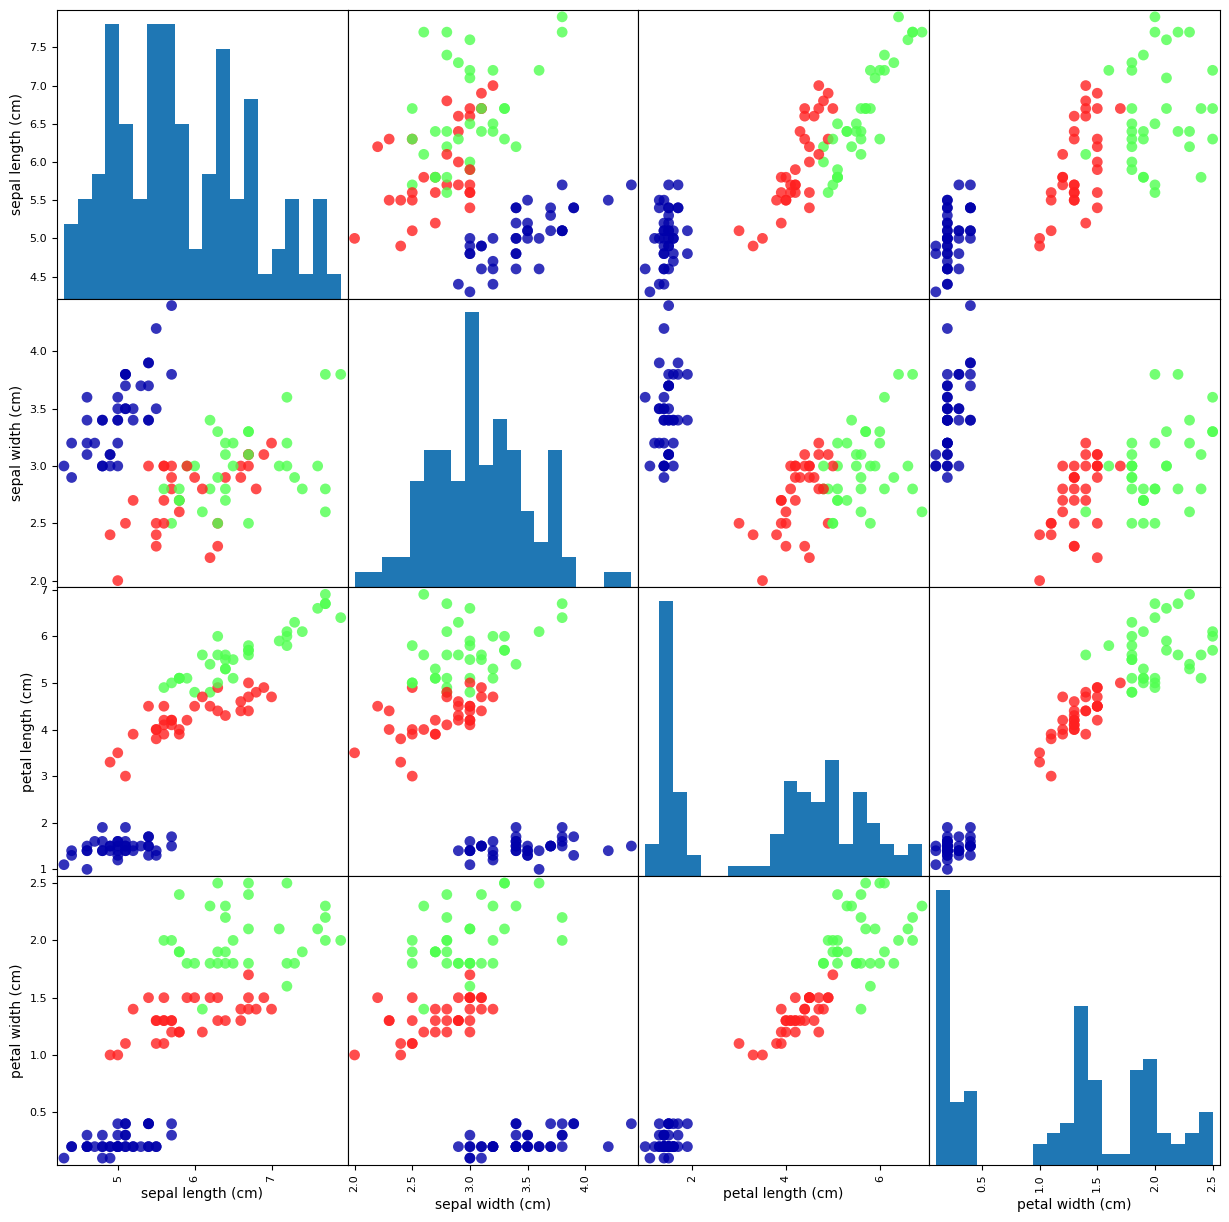

In [23]:
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap=mglearn.cm3);

In [ ]:
## First Model: K-Nearest Neighbors (KNN)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [ ]:
#Evaluating the model

In [27]:
prediction = knn.predict(X_new)

print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])

Prediction: [0]
Predicted target name: ['setosa']


In [28]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [1 2 2 1 2 1 2 1 2 2 2 0 0 1 0 1 0 2 0 0 1 2 0 0 1 1 1 1 0 1 1 1 1 1 2 0 2
 1 2 2 1 1 0 2 2]


In [29]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.89


In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

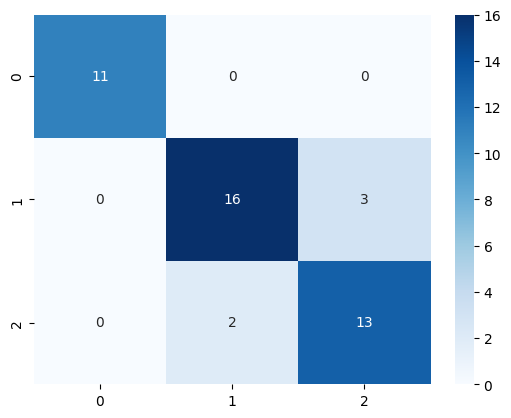

In [33]:

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, cmap='Blues');

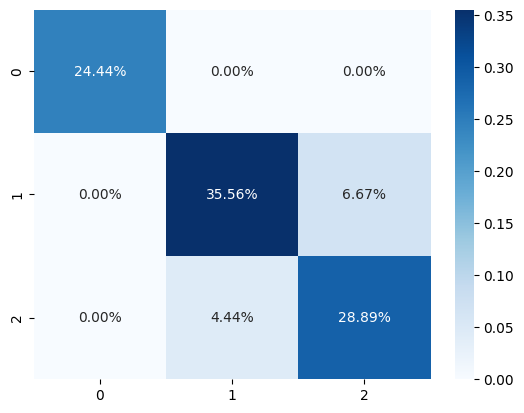

In [34]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues');

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.84      0.89      0.86        18
           2       0.87      0.81      0.84        16

    accuracy                           0.89        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.89      0.89      0.89        45

